# SUS data Acre

This notebook tries to reproduce Figure 2d of Smith et al. (2014).

[Reference:](https://www.nature.com/articles/srep03726)

Smith, L. T., Aragao, L. E., Sabel, C. E., and Nakaya, T. (2014). Drought impacts on children’s respiratory health in the brazilian amazon. Scientific reports, 4:3726.

**================================================================================================**

In [1]:
import sys
import importlib
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# My repository.
repository = "/home/alex/Dropbox/repositories/doctoral_thesis/libraries/"

In [3]:
# Include once my repository in the path for searching libraries.
if repository not in sys.path:
    sys.path.append(repository)
    
# Import my libraries.
import datasus.tools as sus

In [4]:
# Incorpore the onging changes.
importlib.reload(sus);

**ATTENTION!** 

**I have excuded an empty file: RDAC0909.dbf** 

- Actually I did not exclude it, I just altered its extension in order to not be read.

In [5]:
# Where the data live.
directory = "/media/alex/ALEXDATA/data_sets/HEALTH/HOSPITALIZATION/"
state_label = "AC"
state_folder = directory + state_label + "/"

# Read all diseases.
DATA = sus.data_frame(state_folder, verbose=True, log_file="log_AC.txt")

100% (222 of 222) |######################| Elapsed Time: 0:04:07 Time:  0:04:07


In [6]:
DATA.shape

(890803, 12)

In [7]:
# Selecting respiratory diseases.
DATAs = sus.data_frame_selection(DATA, disease_codes=["J"])

In [8]:
DATAs.shape

(88195, 12)

In [9]:
DATAs.head()

,DT_SAIDA,DIAS_PERM,ANO_CMPT,MES_CMPT,IDADE,SEXO,DIAG_PRINC,DIAG_SECUN,MUNIC_MOV,MUNIC_RES,VAL_TOT,MORTE
DT_INTER,,,,,,,,,,,,
1995-11-18,1999-12-04,1477,2000,01,0,3,J180,,120040,120040,201.27,0
1996-02-17,1996-02-22,5,2000,04,32,1,J948,,120040,120010,659.54,1
1997-01-30,1997-02-02,3,2000,04,5,3,J180,,120042,120042,193.32,0
1997-03-28,1997-04-05,8,2000,04,47,1,J189,,120040,120040,193.32,0
1997-04-07,1997-04-11,4,2000,04,55,3,J81,,120040,120040,422.11,0


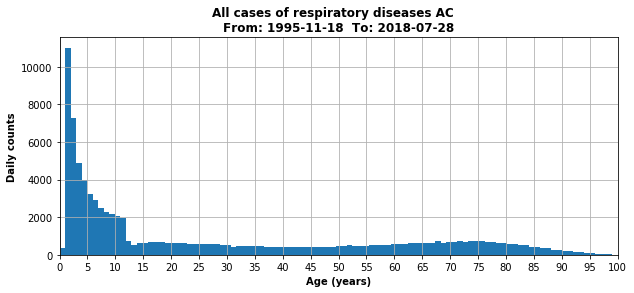

In [10]:
# Distribution of ages.
plt.figure(figsize=(10, 4))
DATAs.IDADE.hist(bins=100)
plt.xticks(range(0, 105, 5))
plt.xlim((0, 100))
plt.xlabel("Age (years)", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")
plt.title("All cases of respiratory diseases " + state_label + "   " + 
          "\nFrom: " + str(DATAs.index[0])[0:10] +  
          "  To: " + str(DATAs.index[-1])[0:10], 
          fontweight="bold")
plt.savefig("/home/alex/Dropbox/repositories/doctoral_thesis/" + \
            "figures/health_data_counts_" + state_label + "1.jpg", dpi=400, 
             bbox_inches="tight")

In [11]:
# Children.
mask1 = DATAs.IDADE <= 5

# Selected period.
mask2 = DATAs.index.year >= 2001
mask3 = DATAs.index.year <= 2010

# Cut.
DATAscp = DATAs[mask1 & mask2 & mask3] 

In [12]:
# Counting occurences.
DATAscp = DATAscp.assign(COUNT=1)
COUNTf = DATAscp.groupby(DATAscp.index.date).count().loc[:, "COUNT"]

# Two more columns for the month.
COUNTf = pd.DataFrame(COUNTf)
COUNTf.index = pd.to_datetime(COUNTf.index)
COUNTf = COUNTf.assign(MONTH=COUNTf.index.month)
COUNTf = COUNTf.assign(MONTH_LABEL=COUNTf.index.month_name())
COUNTf.head()

,COUNT,MONTH,MONTH_LABEL
2001-01-01,2,1,January
2001-01-02,3,1,January
2001-01-03,5,1,January
2001-01-04,3,1,January
2001-01-05,3,1,January


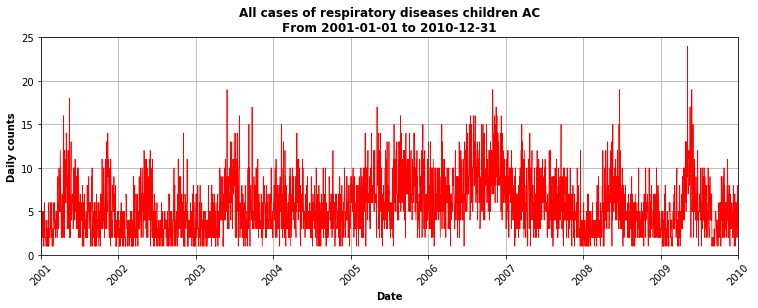

In [13]:
# Time series.
plt.figure(figsize=(12.5, 4))
plt.plot(COUNTf.index, COUNTf.COUNT.values, "-r", linewidth=0.75, markersize=1)
plt.title("All cases of respiratory diseases children " + state_label + "\n" + \
          "From " + str(COUNTf.index[0])[:10] + " to " + str(COUNTf.index[-1])[:10], 
           fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 25))
plt.xlim((pd.Timestamp("2001"),pd.Timestamp("2010")))
plt.xticks(pd.date_range("2001", "2010", freq="YS"), rotation=45)
plt.grid()
plt.savefig("/home/alex/Dropbox/repositories/doctoral_thesis/" + \
            "figures/health_data_counts_" + state_label + "2.jpg", 
            dpi=400, bbox_inches="tight")

In [14]:
# Monthly data.
COUNTfm = COUNTf.COUNT.resample("MS").sum()
COUNTfm = pd.DataFrame(COUNTfm)
COUNTfm = COUNTfm.assign(MONTH=COUNTfm.index.month)
COUNTfm = COUNTfm.assign(MONTH_LABEL=COUNTfm.index.month_name())
COUNTfm.head()

,COUNT,MONTH,MONTH_LABEL
2001-01-01,78,1,January
2001-02-01,67,2,February
2001-03-01,133,3,March
2001-04-01,218,4,April
2001-05-01,229,5,May


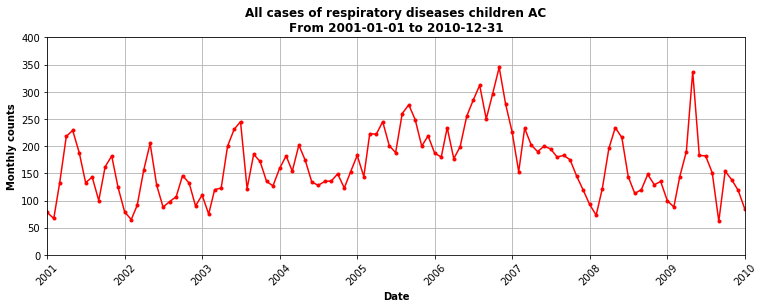

In [15]:
# Time series.
plt.figure(figsize=(12.5, 4))
plt.plot(COUNTfm.index, COUNTfm.COUNT.values, ".-r")
plt.title("All cases of respiratory diseases children " + state_label + "\n" + \
          "From " + str(COUNTf.index[0])[:10] + " to " + str(COUNTf.index[-1])[:10], 
           fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Monthly counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 400))
plt.xlim((pd.Timestamp("2001"),pd.Timestamp("2010")))
plt.xticks(pd.date_range("2001", "2010", freq="YS"), rotation=45)
plt.grid()
plt.savefig("/home/alex/Dropbox/repositories/doctoral_thesis/" + \
            "figures/health_data_counts_" + state_label + "3.jpg", 
            dpi=400, bbox_inches="tight")

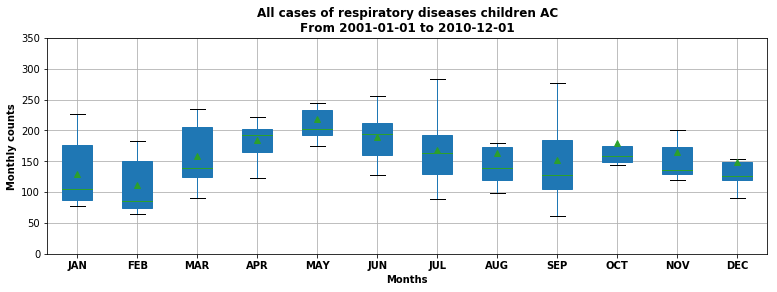

In [16]:
COUNTfm.boxplot(column=["COUNT"], by="MONTH", notch=False, patch_artist=True, showmeans=True, 
                showfliers=False, figsize=(12.5, 4), boxprops={"color": "red"})

plt.ylim((0, 350))
ax = plt.gca()
fig = plt.gcf()
ax.set_xlabel("Months", fontweight="bold")
ax.set_ylabel("Monthly counts", fontweight="bold")
ax.set_xticklabels(["JAN", "FEB", "MAR", "APR", 
                    "MAY", "JUN", "JUL", "AUG", 
                    "SEP", "OCT", "NOV", "DEC"], fontweight="bold")
ax.set_title("All cases of respiratory diseases children " + state_label + "\n" + \
             "From " + str(COUNTfm.index[0])[:10] + " to " + str(COUNTfm.index[-1])[:10], 
              fontweight="bold")
fig.suptitle("")
plt.savefig("/home/alex/Dropbox/repositories/doctoral_thesis/" + \
            "figures/health_data_counts_" + state_label + "4.jpg", 
            dpi=400, bbox_inches="tight")